In [1]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)


y_pred_tr = lr.predict(X_train) # 수치 확인용 , 트레인 어큐러시
y_pred_test = lr.predict(X_test)

print('Train Acc :',accuracy_score(y_train, y_pred_tr)) 
print('Test Acc :',accuracy_score(y_test, y_pred_test))  

Train Acc : 0.7427361939580527
Test Acc : 0.7438461538461538


In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [6]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, lr.predict(X_test)))

[[275 202]
 [131 692]]


In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

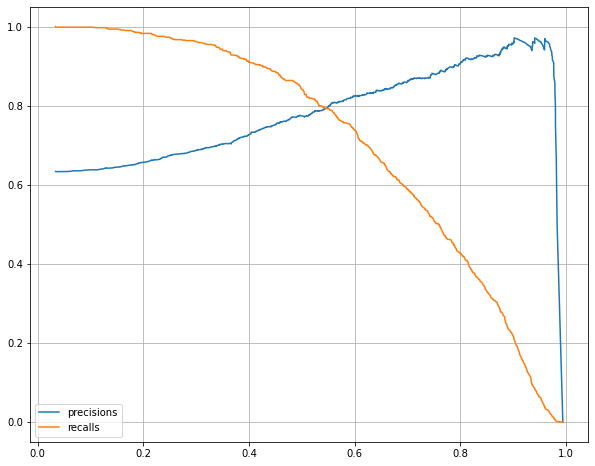

In [8]:
plt.figure(figsize=(10, 8))
pred = lr.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pred)

plt.plot(thresholds, precisions[:len(thresholds)], label='precisions')
plt.plot(thresholds, recalls[:len(thresholds)], label='recalls')
plt.grid()
plt.legend()
plt.show()


In [9]:
pred_proba = lr.predict_proba(X_test)
pred_proba[:3]

array([[0.40526731, 0.59473269],
       [0.50957556, 0.49042444],
       [0.10215001, 0.89784999]])

In [10]:
import numpy as np

np,np.concatenate([pred_proba, y_pred_test.reshape(-1, 1)], axis=1)

(<module 'numpy' from 'C:\\Users\\sanghui\\miniconda3\\envs\\ds_study\\lib\\site-packages\\numpy\\__init__.py'>,
 array([[0.40526731, 0.59473269, 1.        ],
        [0.50957556, 0.49042444, 0.        ],
        [0.10215001, 0.89784999, 1.        ],
        ...,
        [0.22540242, 0.77459758, 1.        ],
        [0.67366935, 0.32633065, 0.        ],
        [0.31452992, 0.68547008, 1.        ]]))

In [12]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)

In [15]:
pred_bin = binarizer.transform(pred_proba)[:,1]
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [16]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [17]:
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67       477
         1.0       0.82      0.74      0.78       823

    accuracy                           0.73      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.73      0.74      1300

